In [1]:
import pandas as pd 
import os

In [2]:
files = os.listdir('data/')
print(files)

['Kona Weather Data - All Years.csv', 'mega_data', 'Runningman2008', 'Runningman2009', 'Runningman2010', 'Runningman2011', 'Runningman2012', 'Runningman2013', 'Runningman2014', 'Runningman2015', 'Runningman2016', 'Runningman2017', 'Runningman2018', 'weather_final']


In [3]:
mega_data = pd.read_csv('data/mega_data')

In [4]:
type(mega_data.Humidity.unique()[0])

numpy.float64

In [5]:
mega_data.South.unique()

array([3.107, 3.21 , 7.853, 8.158, 6.521, 8.111, 5.264, 7.391, 8.429,
       5.068, 0.   ])

In [8]:
agegroup = list(mega_data.Agegroup.unique())

In [11]:
mega_data.head()

,Unnamed: 0,Name,Country,swim,bike,run,finish,Agegroup,Gender,Year,Avg Temp,Hi Temp,Humidity,Wind Speed,Wind Direction,West,South,Female
0,0,"Alexander, Craig",AUS,51.717,277.317,165.000,497.750,Pro,2,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,0
1,1,"Allan, Paolina",CAN,69.367,322.683,212.333,609.633,Pro,1,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,1
2,2,"Al-Sultan, Faris",DEU,51.717,273.400,190.017,519.533,Pro,2,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,0
3,3,"Amey, Paul",GBR,51.750,296.883,176.017,528.967,Pro,2,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,0
4,4,"Bastie, Christophe",FRA,59.050,294.450,193.567,552.350,Pro,2,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,0


In [4]:
features = mega_data[['Agegroup', 'Gender', "Avg Temp", 'Hi Temp', "Humidity", 'Wind Speed', 'West', 'South']]

In [5]:
target_swim = mega_data.swim
target_bike = mega_data.bike
target_run = mega_data.run
target_finish = mega_data.finish

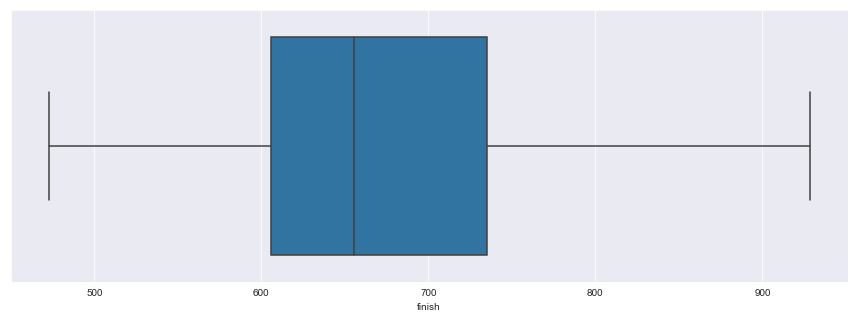

In [119]:
plt.figure(figsize= (15,5))
sns.boxplot(target_finish, showfliers=False)

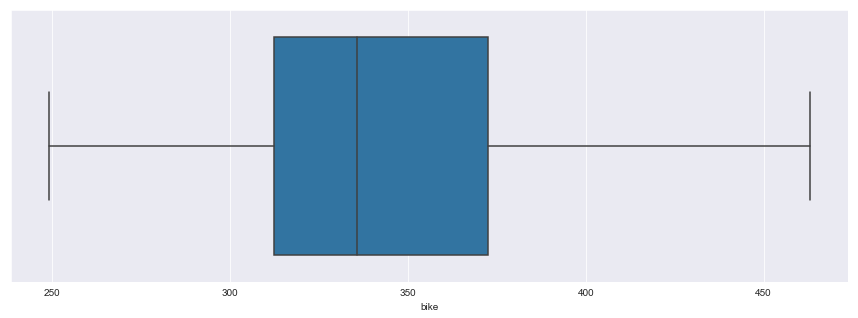

In [120]:
plt.figure(figsize= (15,5))
sns.boxplot(target_bike, showfliers=False)

In [6]:
features.head()

,Agegroup,Gender,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South
0,Pro,2,80.647,84,56.647,8.118,7.5,3.107
1,Pro,1,80.647,84,56.647,8.118,7.5,3.107
2,Pro,2,80.647,84,56.647,8.118,7.5,3.107
3,Pro,2,80.647,84,56.647,8.118,7.5,3.107
4,Pro,2,80.647,84,56.647,8.118,7.5,3.107


In [7]:
features['male'] = pd.get_dummies(features['Gender'], drop_first=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
features.drop('Gender', axis=1, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
features.head()

,Agegroup,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male
0,Pro,80.647,84,56.647,8.118,7.5,3.107,1
1,Pro,80.647,84,56.647,8.118,7.5,3.107,0
2,Pro,80.647,84,56.647,8.118,7.5,3.107,1
3,Pro,80.647,84,56.647,8.118,7.5,3.107,1
4,Pro,80.647,84,56.647,8.118,7.5,3.107,1


In [16]:
age_groups = ['Pro', '18-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54', '55-59', '60-64', '65-69']

In [18]:
age_group = pd.get_dummies(features['Agegroup'])

In [25]:
age_group.index

RangeIndex(start=0, stop=21154, step=1)

In [26]:
features.index

RangeIndex(start=0, stop=21154, step=1)

In [31]:
features = features.merge(age_group, how = 'left', left_index = True, right_index = True)

In [35]:
features = features.drop('Agegroup', axis = 1)

In [37]:
features.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,Pro
0,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,0,0,0,0,0,0,0,1
1,80.647,84,56.647,8.118,7.5,3.107,0,0,0,0,0,0,0,0,0,0,0,1
2,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,0,0,0,0,0,0,0,1
3,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,0,0,0,0,0,0,0,1
4,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,0,0,0,0,0,0,0,1


In [39]:
country_df = pd.get_dummies(mega_data['Country'])

In [40]:
country_df

,---,AND,ARE,ARG,ASM,ATA,ATF,AUS,AUT,BEL,...,UKR,UMI,URY,USA,UZB,VEN,VIR,VNM,ZAF,ZWE
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
features = features.merge(country_df, how = 'left', left_index = True, right_index = True)

In [44]:
features.shape

(21154, 134)

In [46]:
features.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male,18-24,25-29,30-34,...,UKR,UMI,URY,USA,UZB,VEN,VIR,VNM,ZAF,ZWE
0,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.647,84,56.647,8.118,7.5,3.107,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
import seaborn as sns

(array([   4.,   16.,   36.,   70.,   82.,   83.,  134.,  207.,  316.,
         527.,  668.,  859.,  965., 1007.,  948., 1042., 1045.,  937.,
         920.,  967.,  799.,  749.,  710.,  622.,  587.,  557.,  506.,
         392.,  396.,  361.,  322.,  321.,  331.,  274.,  210.,  227.,
         241.,  201.,  207.,  180.,  183.,  161.,  176.,  138.,  159.,
         155.,  118.,  106.,  113.,  106.,  112.,  110.,   84.,  105.,
          78.,   74.,   62.,   53.,   35.]),
 array([ 472.65      ,  481.92825424,  491.20650847,  500.48476271,
         509.76301695,  519.04127119,  528.31952542,  537.59777966,
         546.8760339 ,  556.15428814,  565.43254237,  574.71079661,
         583.98905085,  593.26730508,  602.54555932,  611.82381356,
         621.1020678 ,  630.38032203,  639.65857627,  648.93683051,
         658.21508475,  667.49333898,  676.77159322,  686.04984746,
         695.32810169,  704.60635593,  713.88461017,  723.16286441,
         732.44111864,  741.71937288,  750.99762712, 

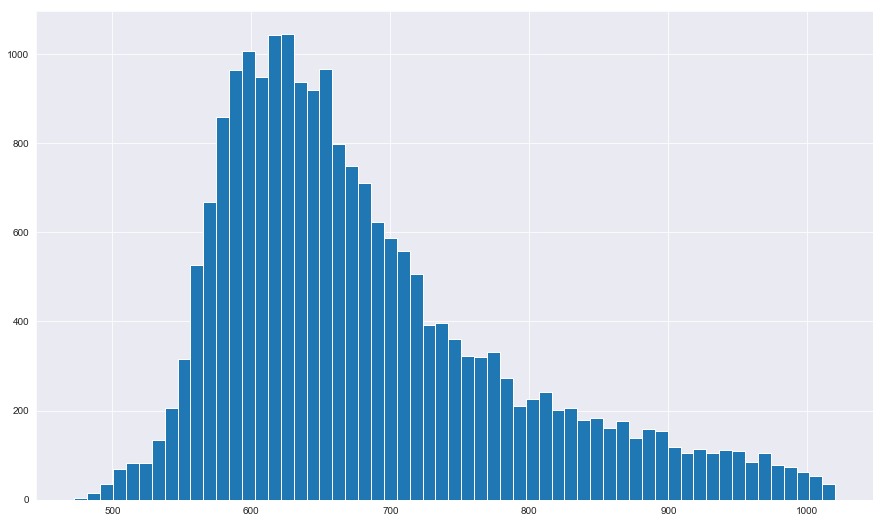

In [61]:
plt.figure(figsize = (15,9))
plt.hist(target_finish, bins = 'auto')

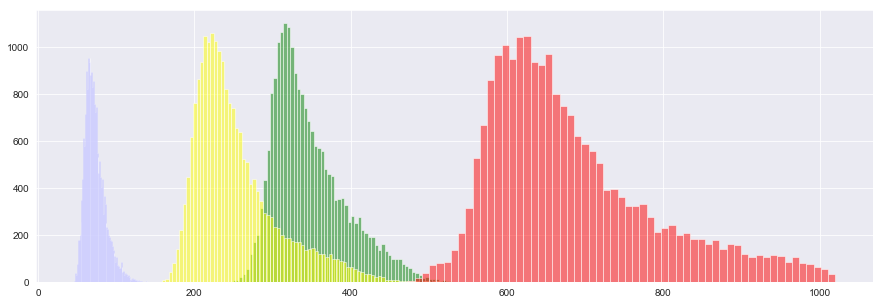

In [71]:
sns.set_style('darkgrid')
plt.figure(figsize= (15,5))
plt.hist(target_swim, bins='auto', alpha = .5, color = 'blue')
plt.hist(target_bike, bins='auto', alpha = .5, color = 'green')
plt.hist(target_run, bins='auto', alpha = .5, color = 'yellow')
plt.hist(target_finish, bins='auto', alpha = .5, color = 'red')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19a026d8>]],
      dtype=object)

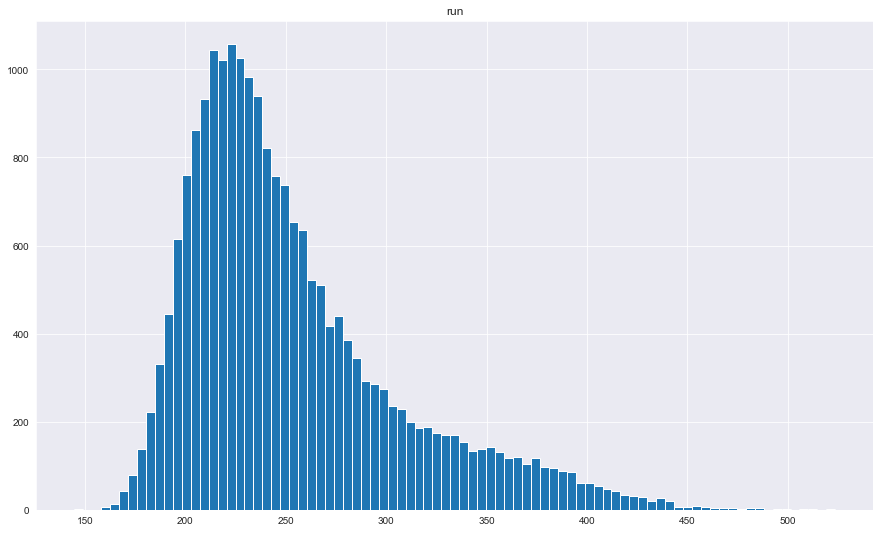

In [57]:
pd.DataFrame(target_run).hist(bins='auto', figsize= (15,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19d9d588>]],
      dtype=object)

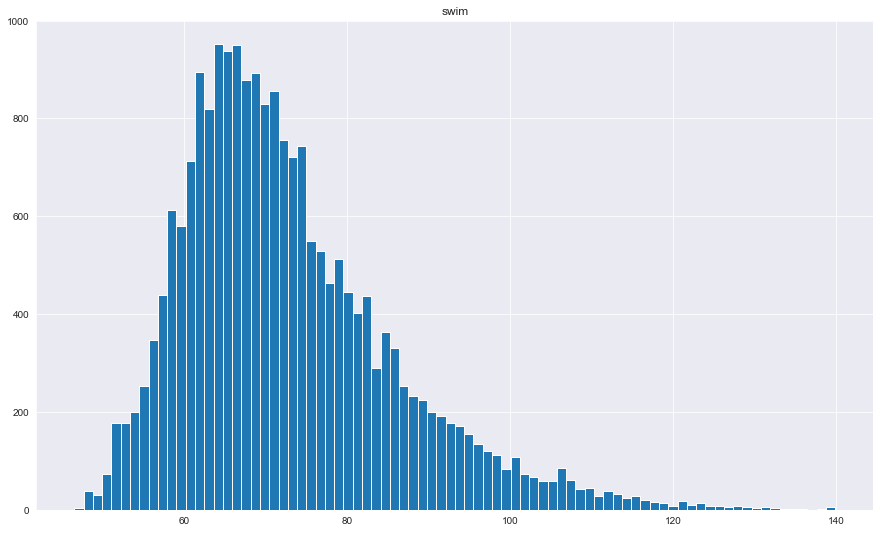

In [58]:
pd.DataFrame(target_swim).hist(bins='auto', figsize= (15,9))

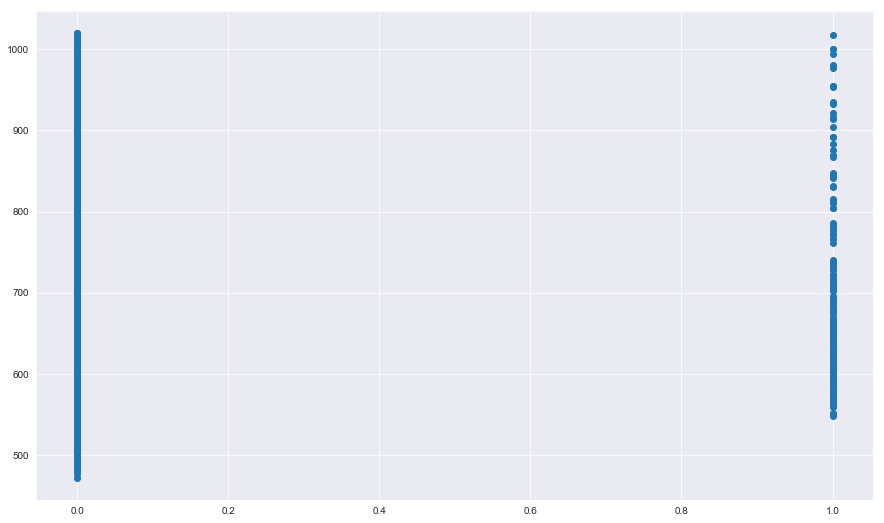

In [85]:
plt.figure(figsize = (15,9))

plt.scatter(features['MEX'], target_finish)

In [74]:
features.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male,18-24,25-29,30-34,...,UKR,UMI,URY,USA,UZB,VEN,VIR,VNM,ZAF,ZWE
0,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.647,84,56.647,8.118,7.5,3.107,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80.647,84,56.647,8.118,7.5,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
mega_data.head()

,Unnamed: 0,Name,Country,swim,bike,run,finish,Agegroup,Gender,Year,Avg Temp,Hi Temp,Humidity,Wind Speed,Wind Direction,West,South,Female
0,0,"Alexander, Craig",AUS,51.717,277.317,165.000,497.750,Pro,2,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,0
1,1,"Allan, Paolina",CAN,69.367,322.683,212.333,609.633,Pro,1,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,1
2,2,"Al-Sultan, Faris",DEU,51.717,273.400,190.017,519.533,Pro,2,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,0
3,3,"Amey, Paul",GBR,51.750,296.883,176.017,528.967,Pro,2,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,0
4,4,"Bastie, Christophe",FRA,59.050,294.450,193.567,552.350,Pro,2,2008,80.647,84,56.647,8.118,WSW,7.5,3.107,0


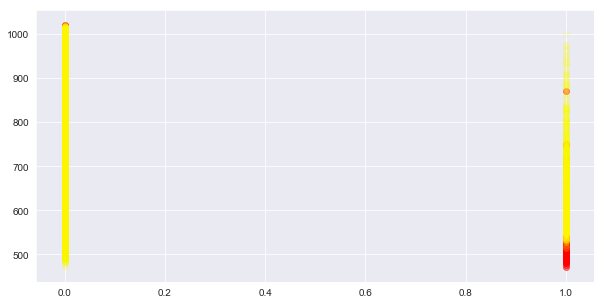

In [92]:
plt.figure(figsize = (10,5))

plt.scatter(features['Pro'], target_finish, color = 'red', alpha = .5)
plt.scatter(features['25-29'], target_finish, color = 'yellow', alpha = .1)

In [108]:
features = features.drop(['swim', 'bike', 'run', 'finish'], axis = 1)

In [130]:
features.shape

(21154, 134)

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [110]:
X_train, X_test, y_train, y_test = train_test_split(features, target_finish, random_state=32,test_size=0.2)


In [121]:
from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()

In [132]:
scaler.fit(X_train.iloc[:,:-128])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-128]), columns=X_train.columns[:-128], index=X_train.index)

# features_scaled_train['female']= X_train.female

# features_scaled_train.head()

In [134]:
features_scaled_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South
17383,-0.197580,-0.357927,-0.436103,-0.906522,0.438878,-0.278299
102,-0.510458,-0.868351,-1.531503,0.223191,1.298054,-1.011162
20924,-0.845229,-1.378775,2.070892,-2.343907,0.752943,-2.172306
15990,0.671274,1.173344,-0.116202,0.592634,-1.351544,0.977770
19368,-0.845229,-1.378775,2.070892,-2.343907,0.752943,-2.172306


In [140]:
features_scaled_train2 = features_scaled_train.merge(X_train.iloc[:, -128:], left_index = True, right_index = True)

In [141]:
features_scaled_train2.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male,18-24,25-29,30-34,...,UKR,UMI,URY,USA,UZB,VEN,VIR,VNM,ZAF,ZWE
17383,-0.197580,-0.357927,-0.436103,-0.906522,0.438878,-0.278299,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
102,-0.510458,-0.868351,-1.531503,0.223191,1.298054,-1.011162,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20924,-0.845229,-1.378775,2.070892,-2.343907,0.752943,-2.172306,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15990,0.671274,1.173344,-0.116202,0.592634,-1.351544,0.977770,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19368,-0.845229,-1.378775,2.070892,-2.343907,0.752943,-2.172306,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [143]:
X_test.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male,18-24,25-29,30-34,...,UKR,UMI,URY,USA,UZB,VEN,VIR,VNM,ZAF,ZWE
9163,85.167,89,65.444,8.111,0.000,8.111,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1276,80.647,84,56.647,8.118,7.500,3.107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1171,80.647,84,56.647,8.118,7.500,3.107,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15575,83.238,88,65.429,8.429,0.000,8.429,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7547,82.222,86,57.667,9.222,6.521,6.521,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [144]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:-128]), columns=X_test.columns[:-128], index=X_test.index)

In [146]:
features_scaled_test2 = features_scaled_test.merge(X_test.iloc[:, -128:], left_index = True, right_index = True)

In [147]:
features_scaled_test2.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male,18-24,25-29,30-34,...,UKR,UMI,URY,USA,UZB,VEN,VIR,VNM,ZAF,ZWE
9163,1.551074,1.683768,-0.113784,0.214875,-1.351544,0.858927,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1276,-0.510458,-0.868351,-1.531503,0.223191,1.298054,-1.011162,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1171,-0.510458,-0.868351,-1.531503,0.223191,1.298054,-1.011162,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15575,0.671274,1.173344,-0.116202,0.592634,-1.351544,0.977770,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7547,0.207886,0.152497,-1.367120,1.534656,0.952193,0.264714,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


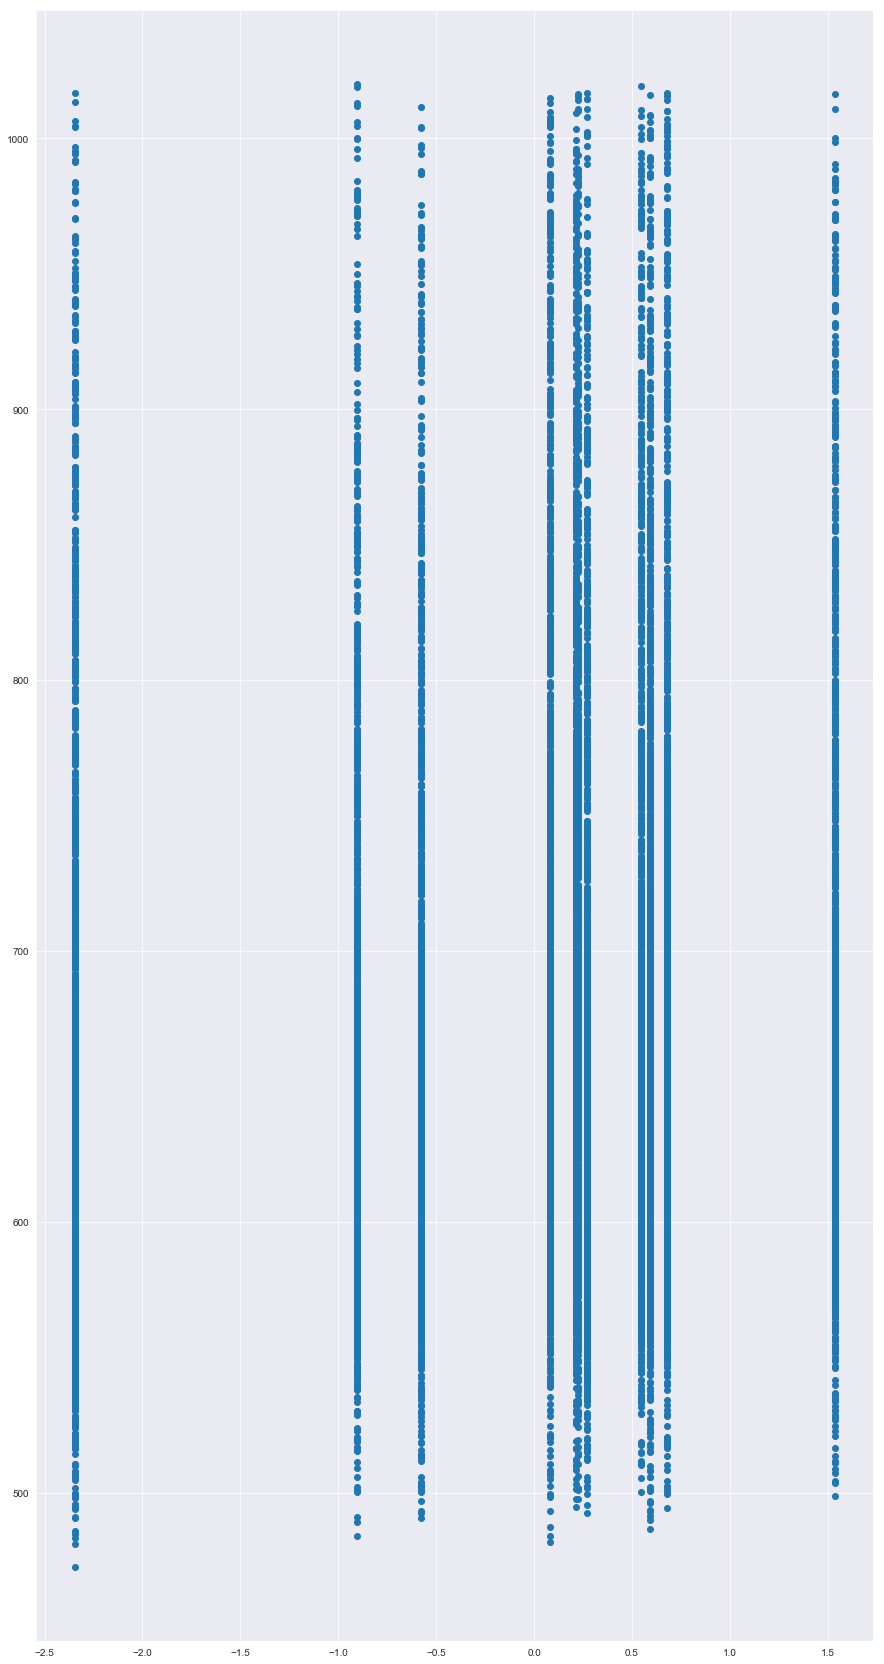

In [157]:
plt.figure(figsize = (15,30))
plt.scatter(features_scaled_train2['Wind Speed'], y_train)

# Feature Engineering

In [158]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_many_train = pd.DataFrame(poly.fit_transform(features_scaled_train2), columns=poly.get_feature_names(features_scaled_train2.columns))
features_many_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male,18-24,25-29,30-34,...,VIR^2,VIR VNM,VIR ZAF,VIR ZWE,VNM^2,VNM ZAF,VNM ZWE,ZAF^2,ZAF ZWE,ZWE^2
0,-0.197580,-0.357927,-0.436103,-0.906522,0.438878,-0.278299,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.510458,-0.868351,-1.531503,0.223191,1.298054,-1.011162,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.845229,-1.378775,2.070892,-2.343907,0.752943,-2.172306,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.671274,1.173344,-0.116202,0.592634,-1.351544,0.977770,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.845229,-1.378775,2.070892,-2.343907,0.752943,-2.172306,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
features_many_test = pd.DataFrame(poly.fit_transform(features_scaled_test2), columns=poly.get_feature_names(features_scaled_test2.columns))
features_many_test.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,male,18-24,25-29,30-34,...,VIR^2,VIR VNM,VIR ZAF,VIR ZWE,VNM^2,VNM ZAF,VNM ZWE,ZAF^2,ZAF ZWE,ZWE^2
0,1.551074,1.683768,-0.113784,0.214875,-1.351544,0.858927,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.510458,-0.868351,-1.531503,0.223191,1.298054,-1.011162,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.510458,-0.868351,-1.531503,0.223191,1.298054,-1.011162,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.671274,1.173344,-0.116202,0.592634,-1.351544,0.977770,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.207886,0.152497,-1.367120,1.534656,0.952193,0.264714,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [162]:
from sklearn.feature_selection import VarianceThreshold

In [163]:
thresholder = VarianceThreshold(threshold=.5)
# any variable that falls beneath the threshold will be removed

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]